# Week 01: Byte-Pair Encoding and Minimum Edit Distance


**1. What is tokenization in the context of natural language processing?**

It's the process of splitting a corpus of text into tokens. A token can be any different
basic unit for understanding a language such as words, only chars, or stems.

**2. Explain Byte Pair Encoding with an example.**
```
Vocabulary: _, d, e, i, l, n, o, r, s, t, w


Words
5 l o w _
2 l o w e s t _
6 n e w e r _
3 w i d e r _
2 n e w _
```

**Preprocessing Step**: 
- Segment the words in different chars and add the additional underscore char.
- Count the words frequency 
- Add the unique chars to a vocabulary. 

1. Look for every pair of characters in each word, count, and get the total frequency (consider the word frequency).
2. Get the pair with the highest frequency (charL, charR)
2. The pair with highest frequency is added to the vocabulary as a single char (NOTE: there can be some ties)
3. Replace each occurance of (charL, charR) in the words, in other words, grouped together as a single char.

**3. Create a basic Byte Pair Encoding algorithm in Python that will work with a test corpus.**

In [20]:
import re
from collections import Counter

In [21]:
corpus = '''
low low low low low 
lowest lowest
newer newer newer newer newer newer
wider wider wider
new new
'''

In [22]:
def preprocess_corpus(corpus):
# Split in words -> count -> split chars -> add underscore
    corpus = re.findall(r'[A-Za-z]+', corpus)
    corpus = Counter(corpus)
    words = [ list(word) + ["_"] for word, freq in corpus.items() ]
    frequencies = [ freq for word, freq in corpus.items() ]
    
    print("Preprocessing: ")
    print(words)
    print(frequencies, "\n")

    return words, frequencies

words, frequencies = preprocess_corpus(corpus)

Preprocessing: 
[['l', 'o', 'w', '_'], ['l', 'o', 'w', 'e', 's', 't', '_'], ['n', 'e', 'w', 'e', 'r', '_'], ['w', 'i', 'd', 'e', 'r', '_'], ['n', 'e', 'w', '_']]
[5, 2, 6, 3, 2] 



In [23]:
def get_most_frequent(words, frequencies, print_process = False):
    
    hashmap = {}

    for word_idx, word in enumerate(words):
        for i in range(len(word)-1):
            charL, charR = word[i], word[i+1]

            if (charL, charR) in hashmap:
                hashmap[(charL, charR)] += frequencies[word_idx]
            else:
                hashmap[(charL, charR)] = frequencies[word_idx]

    max_freq = 0
    max_pair = None
    for pair, freq in hashmap.items():

        if freq > max_freq:
            max_freq = freq
            max_pair = pair
    
    if print_process:
        print("Most Frequent Pair: ")
        print(max_pair, "\n")
    return max_pair


best_pair = get_most_frequent(words, frequencies, print_process= True)

Most Frequent Pair: 
('e', 'r') 



In [24]:
def replace_ocurrances(best_pair, words, print_process = False):

    if print_process:
        print("Replacing Ocurrances:")
        print(words)

    for word_idx, word in enumerate(words):

        for i in range(len(word)-1):
            if (word[i], word[i+1]) == best_pair:
                words[word_idx][i] = word[i] + word[i+1]
                del words[word_idx][i+1]
                break
            
    if print_process:
        print(words, "\n")
    return words

words = replace_ocurrances(best_pair, words, print_process=True)

Replacing Ocurrances:
[['l', 'o', 'w', '_'], ['l', 'o', 'w', 'e', 's', 't', '_'], ['n', 'e', 'w', 'e', 'r', '_'], ['w', 'i', 'd', 'e', 'r', '_'], ['n', 'e', 'w', '_']]
[['l', 'o', 'w', '_'], ['l', 'o', 'w', 'e', 's', 't', '_'], ['n', 'e', 'w', 'er', '_'], ['w', 'i', 'd', 'er', '_'], ['n', 'e', 'w', '_']] 



In [25]:
def byte_pair_encoding(corpus, k, print_process = False):

    # Let's convert everything to lower case
    corpus = corpus.lower()

    # Find the unique char of the vocabulary 
    vocabulary = ["_"] + list(set(re.findall(r'[A-Za-z]', corpus)))

    # Split the words in a list of list, where each word is a list of chars.
    # And get the frequency of each repeated word.
    words, frequencies = preprocess_corpus(corpus)
                
    # k maximum merges
    for i in range(k):
        print(f"Iteration {i}:")

        # Finding the most frequent pair of adjacent chars
        charL, charR = get_most_frequent(words, frequencies, print_process)

        # Joining and adding new char to the vocabulary
        new_char = charL + charR
        vocabulary.append(new_char)
        print("vocabulary:", vocabulary, "\n")

        # Replacing the char in the words
        words = replace_ocurrances((charL, charR), words, print_process)

    return vocabulary

In [26]:
corpus = '''
low low low low low 
lowest lowest
newer newer newer newer newer newer
wider wider wider
new new
'''

vocabulary = byte_pair_encoding(corpus, k = 8)


Preprocessing: 
[['l', 'o', 'w', '_'], ['l', 'o', 'w', 'e', 's', 't', '_'], ['n', 'e', 'w', 'e', 'r', '_'], ['w', 'i', 'd', 'e', 'r', '_'], ['n', 'e', 'w', '_']]
[5, 2, 6, 3, 2] 

Iteration 0:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er'] 

Iteration 1:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_'] 

Iteration 2:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_', 'ne'] 

Iteration 3:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_', 'ne', 'new'] 

Iteration 4:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_', 'ne', 'new', 'lo'] 

Iteration 5:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_', 'ne', 'new', 'lo', 'low'] 

Iteration 6:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e', 'i', 'd', 'l', 'n', 's', 'er', 'er_', 'ne', 'new', 'lo', 'low', 'newer_'] 

Iteration 7:
vocabulary: ['_', 'w', 'r', 'o', 't', 'e',

**4. What is the minimum edit distance and its significance in NLP?**

The minimum edit distance corresponds to the minimum number of operations (deletion, insertation and substitution) that must done in order to transform one word into another.


**5. Compute the edit distance (using insertion cost 1, deletion cost 1, substitution cost 1) of leda to deal. Show your work (using the edit distance grid).**

NOTE: Check ipad to check results


**6. Figure out whether drive is closer to brief or to divers and what the edit distance is to each. Use Levehnstein distance.**

TODO (Exercise for practice to exam): By hand calculate

**7. Now implement a minimum edit distance algorithm and use your hand-computed results to check your code**

In [27]:
import numpy as np

def minimum_edit_distance(source, target, levehnstein = False):
    n = len(source)
    m = len(target)

    # In order to include the zero row and column + 1
    distance_matrix = np.zeros((n + 1,m + 1))

    # Init zero column and zero row
    for i in range(n + 1):
        distance_matrix[i,0] = i

    for j in range(n + 1):
        distance_matrix[0,j] = j

    # All cost = 1
    for i in range(1, n + 1):
        for j in range(1, m + 1):

            if levehnstein:
                substitution_cost = 0 if source[i-1] == target[j-1] else 2
            else:
                substitution_cost = 0 if source[i-1] == target[j-1] else 1

            distance_matrix[i,j] = min(
                distance_matrix[i-1,j] + 1,
                distance_matrix[i-1,j-1] + substitution_cost,
                distance_matrix[i,j-1] + 1
            )
    return distance_matrix


In [30]:
minimum_edit_distance(source = "tttsadset", target = "ndasmaeel")

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [1., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [2., 2., 2., 3., 4., 5., 6., 7., 8., 9.],
       [3., 3., 3., 3., 4., 5., 6., 7., 8., 9.],
       [4., 4., 4., 4., 4., 5., 6., 7., 8., 9.],
       [5., 5., 5., 5., 5., 5., 6., 7., 8., 9.],
       [6., 6., 6., 6., 6., 6., 6., 7., 8., 9.],
       [7., 7., 7., 7., 7., 7., 7., 7., 8., 9.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [28]:
minimum_edit_distance(source = "intention", target = "execution")

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [1., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [2., 2., 2., 3., 4., 5., 6., 7., 8., 9.],
       [3., 3., 3., 3., 4., 5., 6., 7., 8., 9.],
       [4., 4., 4., 4., 4., 5., 6., 7., 8., 9.],
       [5., 5., 5., 5., 5., 5., 6., 7., 8., 9.],
       [6., 6., 6., 6., 6., 6., 6., 7., 8., 9.],
       [7., 7., 7., 7., 7., 7., 7., 7., 8., 9.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [29]:
minimum_edit_distance(source = "intention", target = "execution", levehnstein = True)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  6.,  7.,  8.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  7.,  8.,  7.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  7.,  8.,  9.,  8.],
       [ 4.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  9.],
       [ 5.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 10.],
       [ 6.,  5.,  6.,  7.,  8.,  9.,  8.,  9., 10., 11.],
       [ 7.,  6.,  7.,  8.,  9., 10.,  9.,  8.,  9., 10.],
       [ 8.,  7.,  8.,  9., 10., 11., 10.,  9.,  8.,  9.],
       [ 9.,  8.,  9., 10., 11., 12., 11., 10.,  9.,  8.]])

# Questions 
1. We always would get the same edit minimum distance between words of the same size if we use only cost of 1
    - NO: **NOTE**: A substitution with a same letter will always have cost zero, even in the case when every operation costs 1.
    - Is a bad assumption all the costs to 1? 
    - Is better a cost substitution = 2 (if the chars are different) because we at least are comparing some chars, right?
    - But in general, it would be better to create more specialized functions, which give more weight to particular substitutions, right?
2. Do you think is necessary to know how to calculate this edit distance by hand? Because the questions 4 and 5 ask us for that? Or is only enough with doing a fast estimation doing an aligment like this
YES, it's important to know how to run the algorithm with small examples (it's not too difficult just focus in the closes cells to do calculation)

3. I don't understand where the aligment came into play. What an aligment really means? Is only as the image below.

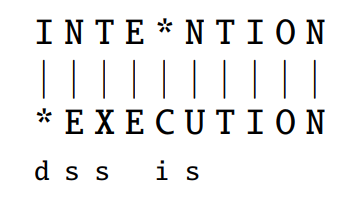|

The alignment indicates in a visual way the path that you have to take in order to convert from one string to the other.

4. How backtrace works in order to get an alignment?
It always take the less cost path in order to get the alignment with the minimum distance. 
NOTE: However I still don't understand why in some cases we use more than 1 pointer.
    - **Why three pointers in some situations?**

5. Backtrace find the best alignment or is only a way to find a possible aligment. You can take any path back to the beginning, right?
Ir order to get the best alignment you always have to take the minimum path

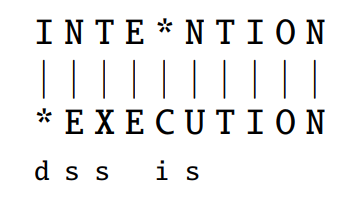




# Important Takeways

- In general, for each Application we have to search an specific tokenizer for task at hand.

